In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/languages.csv')

df2 = pd.read_csv('../outputs/eci_software_2020_2023.csv',sep=';')

In [166]:
df2

,iso2_code,language,num_pushers,period,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,year
0,AE,ANTLR,0,1,18,17,0,-0.294460,2.335159,0.037316,-0.330396,1.303204,0.0,2020
1,AE,ASP.NET,0,1,18,38,0,-0.294460,0.283921,0.213137,-0.330396,0.156123,0.0,2020
2,AE,Ada,0,1,18,9,0,-0.294460,2.289965,0.026459,-0.330396,0.973394,0.0,2020
3,AE,Apex,0,1,18,7,0,-0.294460,2.001467,0.031454,-0.330396,0.905917,0.0,2020
4,AE,AppleScript,0,1,18,9,0,-0.294460,2.593304,0.023655,-0.330396,1.232115,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89834,ZW,Vue,0,1,12,51,0,-0.332821,-0.030690,0.113753,-0.562502,0.026070,0.0,2023
89835,ZW,XS,0,1,12,16,0,-0.332821,2.200258,0.025316,-0.562502,1.021668,0.0,2023
89836,ZW,XSLT,0,1,12,31,0,-0.332821,1.911431,0.042864,-0.562502,0.914582,0.0,2023
89837,ZW,Yacc,0,1,12,26,0,-0.332821,2.270072,0.036572,-0.562502,1.095435,0.0,2023


In [140]:
df = df[(df['quarter']==4)&
        (df['language'].isin(df2.language.unique()))&
        (df['iso2_code'].isin(df2.iso2_code.unique()))
        ]

In [141]:
df

,num_pushers,language,language_type,iso2_code,year,quarter
15526,3255,HTML,markup,AE,2020,4
15527,2250,CSS,markup,AE,2020,4
15528,624,SCSS,markup,AE,2020,4
15529,480,Jupyter Notebook,markup,AE,2020,4
15530,137,Vue,markup,AE,2020,4
...,...,...,...,...,...,...
99438,198,TypeScript,programming,ZW,2023,4
99439,150,C,programming,ZW,2023,4
99440,140,Dockerfile,programming,ZW,2023,4
99441,140,PHP,programming,ZW,2023,4


In [74]:
global_lang=df.groupby(['year','language'])['num_pushers'].sum().unstack(0).pct_change(axis=1)*100

In [124]:
aligned_data

,RU,ME,global,RU_n,ME_n
language,,,,,
C,8.955605,13.592233,11.660278,-0.231956,0.165687
C#,-11.554188,23.529412,7.846221,-2.472580,1.998821
C++,9.701422,4.807692,8.687368,0.116727,-0.446588
Dockerfile,28.930946,58.252427,18.564157,0.558430,2.137898
Java,-5.460189,13.068182,2.848586,-2.916807,3.587604
JavaScript,5.170749,25.821596,13.615758,-0.620238,0.896449
Makefile,7.917930,23.622047,5.600482,0.413794,3.217860
PHP,-7.672428,-2.777778,7.054460,-2.087600,-1.393762
Python,10.685009,33.230769,17.744262,-0.397833,0.872761


In [132]:
m_std=percent_diff[year+1].replace([np.inf, -np.inf], np.nan).agg(['mean','std']).transpose()

aligned_data.index.map(lambda x: m_std.loc[x]['mean'])


Float64Index([ 22.572285995095825,  12.970331726840985,  15.279039034086505,
                23.31067399048189,   6.227675252422599,   16.30857277241645,
                7.893735981005162,   6.810409472025677,   23.02178140627991,
               2.2927794396585433, -24.736531686656313,   38.22221494949984],
             dtype='float64', name='language')

In [162]:
vector_data = {}
years = [2020, 2021, 2022, 2023]

for year in years:
    year_data = df[df['year'] == year]
    vector_data[year] = year_data.groupby(['iso2_code', 'language'])['num_pushers'].sum().unstack(fill_value=0)

# Step 2: Calculate the percentage difference year-to-year within each country for each language
percent_diff = {}
for year in range(2020, 2023):
    current_year = vector_data[year]
    next_year = vector_data[year + 1]
    percent_diff[year+1] = np.log((next_year) / current_year)

    
correlations = {country: {} for country in ['GE', 'AM', 'CY', 'ME']}
for year in range(2020, 2023):
    ru_changes = percent_diff[year+1].loc['RU']
    #m_std=percent_diff[year+1].replace([np.inf, -np.inf], np.nan).agg(['mean','std']).transpose()
    for country in ['GE', 'AM', 'CY', 'ME']:
        country_changes = percent_diff[year+1].loc[country]
        # Ensuring both series are aligned and non-null
        aligned_data = pd.concat([ru_changes, country_changes], axis=1).dropna().replace(np.inf,1)
        aligned_data[country]
        #aligned_data['global']=aligned_data.index.map(lambda x: global_lang.loc[x][year+1])
        #aligned_data['globalm']=aligned_data.index.map(lambda x: m_std.loc[x]['mean'])
        #aligned_data['globalstd']=aligned_data.index.map(lambda x: m_std.loc[x]['mean'])

        #aligned_data['RU_n']=(aligned_data['RU']-aligned_data['globalm'])/aligned_data['globalstd']
        #aligned_data[country+'_n']=(aligned_data[country]-aligned_data['globalm'])/aligned_data['globalstd']
        #aligned_data.corr()
        
        #if not aligned_data.empty:
        #    corr_value = aligned_data.corr().iloc[0, 1]
        #else:
        #    corr_value = None
        correlations[country][year+1] = aligned_data.corr(method="pearson")['RU'][country]

# Displaying year-to-year percentage changes for quick reference
correlations

/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'GE': {2021: 0.5306694857818025,
  2022: 0.04939032027951642,
  2023: 0.23484887464893786},
 'AM': {2021: 0.6745937416472739,
  2022: -0.2848408730232891,
  2023: 0.39918388355124657},
 'CY': {2021: 0.4065143540712495,
  2022: -0.4012636966050985,
  2023: 0.7836722253744394},
 'ME': {2021: 0.9201804483086085,
  2022: -0.00025238665657015415,
  2023: 0.7214521119479849}}

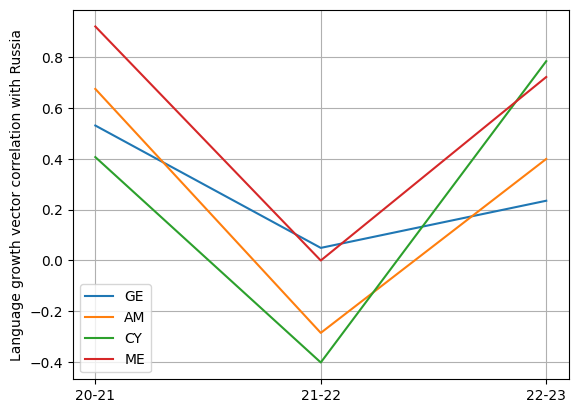

In [165]:
pd.DataFrame(correlations).plot()
plt.ylabel('Language growth vector correlation with Russia')
plt.xticks(ticks=[2021, 2022, 2023],labels=['20-21','21-22','22-23'])
plt.grid()

In [171]:
percent_diff

{2021: language   ANTLR  ASP.NET  Ada  Apex  AppleScript  Assembly  Astro  \
 iso2_code                                                            
 AD           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 AE           NaN      NaN  NaN   NaN          NaN       0.0    NaN   
 AF           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 AL           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 AM           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 ...          ...      ...  ...   ...          ...       ...    ...   
 XK           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 YE           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 ZA           NaN      0.0  NaN   NaN          NaN       0.0    NaN   
 ZM           NaN      NaN  NaN   NaN          NaN       NaN    NaN   
 ZW           NaN      NaN  NaN   NaN          NaN       0.0    NaN   
 
 language   AutoHotkey  Awk  Batchfile  ...  VHDL  Verilog  Vim Scrip

In [209]:
vector_data = {}
years = [2020, 2021, 2022, 2023]

for year in years:
    year_data = df2[df2['year'] == year]
    vector_data[year] = year_data.groupby(['iso2_code', 'language'])['rca'].sum().unstack(fill_value=0)

# Step 2: Calculate the percentage difference year-to-year within each country for each language
percent_diff = {}
for year in range(2020, 2023):
    current_year = vector_data[year]
    next_year = vector_data[year + 1]
    percent_diff[year+1] = np.log((next_year) / current_year)

    
correlations = {country: {} for country in ['GE', 'AM', 'CY', 'ME','RS','PL','CA']}
for year in range(2020, 2023):
    ru_changes = percent_diff[year+1].loc['RU']
    #m_std=percent_diff[year+1].replace([np.inf, -np.inf], np.nan).agg(['mean','std']).transpose()
    for country in ['GE', 'AM', 'CY', 'ME','RS','PL','CA']:
        country_changes = percent_diff[year+1].loc[country]
        # Ensuring both series are aligned and non-null
        aligned_data = pd.concat([ru_changes, country_changes], axis=1).dropna()#.replace(np.inf,1)
        aligned_data[country]
        #aligned_data['global']=aligned_data.index.map(lambda x: global_lang.loc[x][year+1])
        #aligned_data['globalm']=aligned_data.index.map(lambda x: m_std.loc[x]['mean'])
        #aligned_data['globalstd']=aligned_data.index.map(lambda x: m_std.loc[x]['mean'])

        #aligned_data['RU_n']=(aligned_data['RU']-aligned_data['globalm'])/aligned_data['globalstd']
        #aligned_data[country+'_n']=(aligned_data[country]-aligned_data['globalm'])/aligned_data['globalstd']
        #aligned_data.corr()
        
        #if not aligned_data.empty:
        #    corr_value = aligned_data.corr().iloc[0, 1]
        #else:
        #    corr_value = None
        correlations[country][year+1] = aligned_data.corr(method="spearman")['RU'][country]

# Displaying year-to-year percentage changes for quick reference
correlations

/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/johanneswachs/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'GE': {2021: 0.0030959752321981426,
  2022: -0.20902255639097744,
  2023: 0.4612299465240642},
 'AM': {2021: 0.12478825522303783,
  2022: -0.46922642574816487,
  2023: 0.26632478632478634},
 'CY': {2021: -0.09010989010989011,
  2022: -0.3142857142857143,
  2023: 0.4624505928853755},
 'ME': {2021: 0.8, 2022: 0.3, 2023: 0.4107142857142857},
 'RS': {2021: 0.26151866151866154,
  2022: -0.07307692307692308,
  2023: -0.10660008684324794},
 'PL': {2021: 0.1263606086479579,
  2022: 0.09706737596645854,
  2023: 0.06061303269678145},
 'CA': {2021: 0.12351092620802918,
  2022: 0.0474443783189892,
  2023: 0.028807021466905187}}

(-1.0, 1.0)

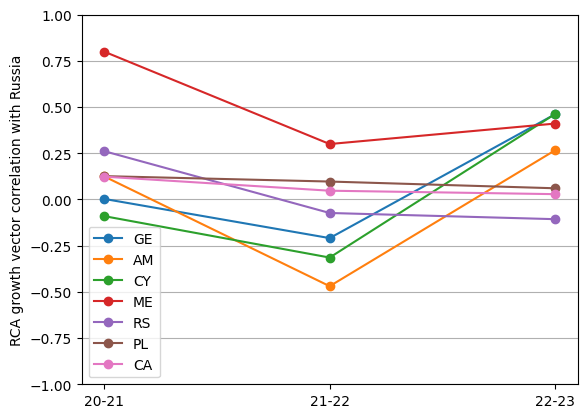

In [210]:
pd.DataFrame(correlations).plot(marker='o')
plt.ylabel('RCA growth vector correlation with Russia')
plt.xticks(ticks=[2021, 2022, 2023],labels=['20-21','21-22','22-23'])
plt.grid(axis='y')
plt.ylim([-1,1])

<AxesSubplot: xlabel='RU', ylabel='ME'>

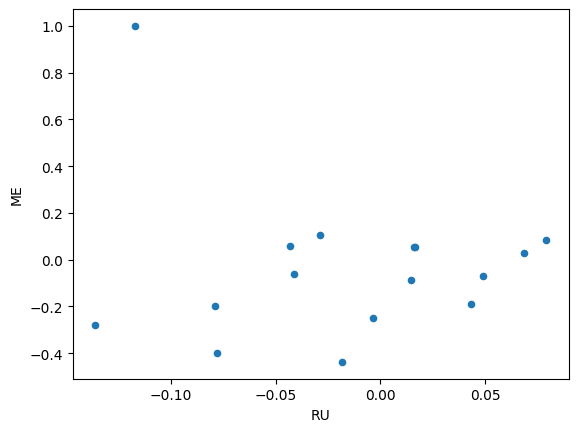

In [175]:
aligned_data.plot(kind='scatter',x='RU',y='ME')

In [70]:
aligned_data['global']=aligned_data.index.map(lambda x: global_lang.loc[x][year+1])
aligned_data['RU_n']=aligned_data['RU']/aligned_data['global']
aligned_data['ME_n']=aligned_data['ME']/aligned_data['global']
aligned_data.corr()['RU_n']['ME_n']

0.852775074330908

In [66]:
global_lang.loc['C']

year
2020          NaN
2021    11.135456
2022    30.573478
2023    11.660278
Name: C, dtype: float64

In [20]:
# Preparing the data for each year to calculate changes year by year
years = [2020, 2021, 2022]
correlations_by_year = {}

for start_year in years:
    end_year = start_year + 1
    
    # Filter data for start and end year
    data_start = df[df['year'] == start_year]
    data_end = df[df['year'] == end_year]
    
    # Summing up the developers for each language and country for start and end year
    sum_start = data_start.groupby(['iso2_code', 'language'])['num_pushers'].sum().reset_index()
    sum_end = data_end.groupby(['iso2_code', 'language'])['num_pushers'].sum().reset_index()
    
    # Merging and calculating changes
    merged_yearly = sum_start.merge(sum_end, on=['iso2_code', 'language'], suffixes=('_start', '_end'))
    merged_yearly['change_in_developers'] = merged_yearly['num_pushers_end'] - merged_yearly['num_pushers_start']
    merged_yearly['average_pushers'] = (merged_yearly['num_pushers_start'] + merged_yearly['num_pushers_end']) / 2
    
    # Separate data for Russia and other countries
    russia_yearly = merged_yearly[merged_yearly['iso2_code'] == 'RU']
    other_countries_yearly = merged_yearly[merged_yearly['iso2_code'].isin(['GE', 'AM', 'CY', 'ME'])]
    
    # Merging Russia's data with the other countries' data to align by language
    merged_changes_yearly = russia_yearly.merge(other_countries_yearly, on='language', suffixes=('_RU', '_OC'))
    
    # Calculating weighted correlation
    weights_yearly = merged_changes_yearly['average_pushers_OC']
    russia_changes_yearly = merged_changes_yearly['change_in_developers_RU']
    other_countries_changes_yearly = merged_changes_yearly['change_in_developers_OC']
    
    # Approximating weighted correlation
    approx_weights_yearly = weights_yearly.round().astype(int)
    weighted_russia_changes_yearly = np.repeat(russia_changes_yearly, approx_weights_yearly)
    weighted_other_changes_yearly = np.repeat(other_countries_changes_yearly, approx_weights_yearly)
    
    # Correlation calculation
    if len(weighted_russia_changes_yearly) > 1 and len(weighted_other_changes_yearly) > 1:  # Ensure there is data to correlate
        yearly_correlation = np.corrcoef(weighted_russia_changes_yearly, weighted_other_changes_yearly)[0, 1]
    else:
        yearly_correlation = None  # No data to correlate

    correlations_by_year[f"{start_year} to {end_year}"] = yearly_correlation

# Displaying the correlations for each year
correlations_by_year


{'2020 to 2021': 0.6248589274004523,
 '2021 to 2022': 0.3638792109720031,
 '2022 to 2023': 0.46289780015420023}